In [1]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

In [2]:
def point_to_point_trajectory(xs, xg, t):
    return xs + t*(xg - xs)

In [3]:
# Let's generate a trajectory
# 1-D case
xs = 1.
xg = 2.

T = 3.

times = np.arange(0., T + 0.05, 0.05)
traj = [point_to_point_trajectory(xs, xg, t) for t in times]

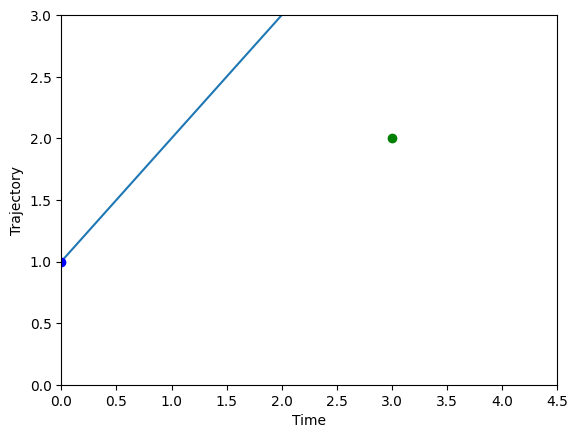

In [4]:
# Let's plot to see how it looks like!
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(times, traj)
ax.plot([0.], [xs], 'bo')
ax.plot([T], [xg], 'go')

plt.xlim(0., 1.5 * T)
plt.ylim(0., 3.)

plt.xlabel('Time')
plt.ylabel('Trajectory');

In [5]:
# Let's make a straight line that can handle different max time
def point_to_point_trajectory(xs, xg, t, T = 1.):
    return xs + (t/T)*(xg - xs)

In [6]:
# Let's generate a trajectory
# 1-D case
xs = 1.
xg = 2.

T = 3.

times = np.arange(0., T + 0.05, 0.05)
traj = [point_to_point_trajectory(xs, xg, t, T) for t in times]

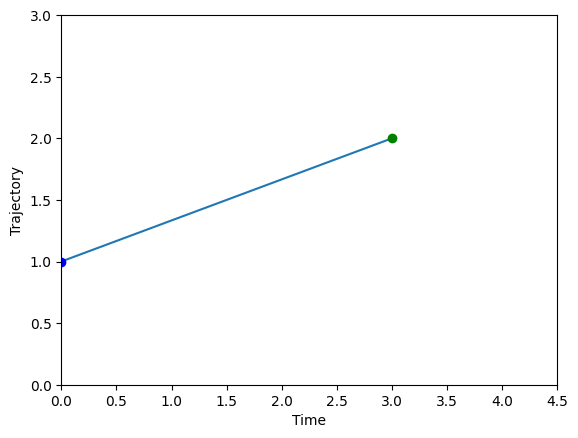

In [7]:
# Let's plot to see how it looks like!
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(times, traj)
ax.plot([0.], [xs], 'bo')
ax.plot([T], [xg], 'go')

plt.xlim(0., 1.5 * T)
plt.ylim(0., 3.)

plt.xlabel('Time')
plt.ylabel('Trajectory');

In [8]:
# Let's do a 2D case!
xs = np.array([[1., 1.]]).T
xg = np.array([[3., 2.]]).T

T = 3.

times = np.arange(0., T + 0.05, 0.05)
traj = [point_to_point_trajectory(xs, xg, t, T) for t in times]

In [ ]:
# Let's plot to see how it looks like!
fig = plt.figure()
ax = fig.add_subplot(111)

for p in traj:
    ax.plot(p[0, 0], p[1, 0], '.')
ax.plot(xs[0, 0], xs[1, 0], 'bo')
ax.plot(xg[0, 0], xg[1, 0], 'go')

plt.xlabel('x')
plt.ylabel('y');

In [ ]:
# Now let's do a cubic spline

# First calculate coefficients
def calculate_coeffs(xs, xg, T):
    # split inputs
    N = int(xs.shape[0] / 2)
    qs = xs[:N, :]
    vs = xs[N:, :]
    qg = xg[:N, :]
    vg = xg[N:, :]

    c0 = np.copy(qs)
    c1 = np.copy(vs)
    c2 = 3.*qg/(T**2) - 3.*qs/(T**2) - 2.*vs/T - vg/T
    c3 = -2.*qg/(T**3) + 2.*qs/(T**3) + vs/(T**2) + vg/(T**2)

    return c0, c1, c2, c3

# Now let's make the trajectory
def cubic_spline(t, c0, c1, c2, c3):
    return c3 * (t**3) + c2 * (t**2) + c1 * t + c0

In [ ]:
# Let's try the 2D case
xs = np.array([[1., 1., 0., 0.]]).T
xg = np.array([[3., 2., -5., 1.]]).T

T = 3.

c0, c1, c2, c3 = calculate_coeffs(xs, xg, T)

times = np.arange(0., T + 0.05, 0.05)
traj = [cubic_spline(t, c0, c1, c2, c3) for t in times]

In [ ]:
# Let's plot to see how it looks like!
fig = plt.figure()
ax = fig.add_subplot(111)

for p in traj:
    ax.plot(p[0, 0], p[1, 0], '.')
ax.plot(xs[0, 0], xs[1, 0], 'bo')
ax.plot(xg[0, 0], xg[1, 0], 'go')

plt.xlabel('x')
plt.ylabel('y');

# What is the difference with the previous one? Can you spot it?

In [ ]:
# Velocities
def cubic_spline_vel(t, c0, c1, c2, c3):
    return 3. * c3 * (t**2) + 2. * c2 * t + c1

vel = [cubic_spline_vel(t, c0, c1, c2, c3) for t in times]

# Let's plot the velocities
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(times, np.array(vel)[:, 0, 0], label='Velocity x')
ax.plot(times, np.array(vel)[:, 1, 0], label='Velocity y')

ax.legend()

plt.xlabel('Time')
plt.ylabel('Velocities');